# FILTROS DIGITALES

<h1>Filtros FIR</h1>
<h2>Filtros IIR</h2>
<span style="font-size: 100px;">Usando pyfdax</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.io import wavfile
import os

# LECTURA DE DATOS

In [ ]:
from google.colab import userdata
path_signal = userdata.get('signal_test1')
path_signal

'/content/drive/MyDrive/Colab Notebooks/ISB/signal_varios/signal1.wav'

In [ ]:
fs, data = wavfile.read(path_signal)

fs, data

(400,
 array([ 0.        ,  0.69889682,  1.35079275, ..., -1.91245554,
        -1.35079275, -0.69889682]))

In [ ]:
N = len(data)
n = np.arange(N)
Ts = 1/fs
t = n*Ts

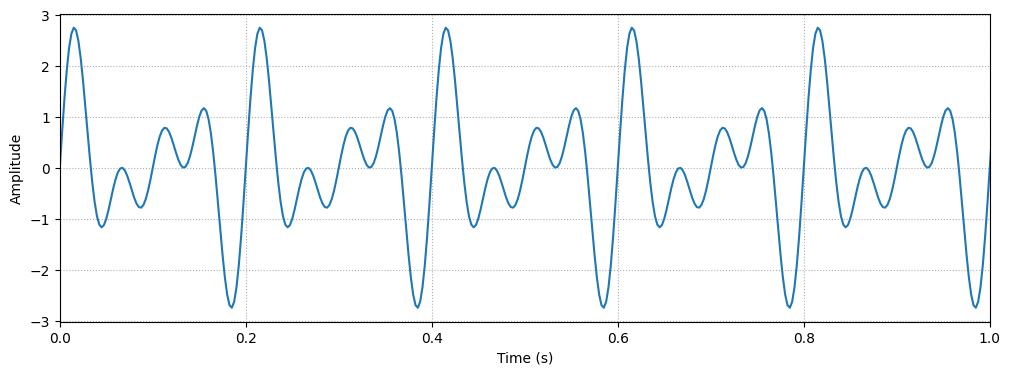

In [ ]:
# @title GRÁFICA EN EL DOMINIO UNIVERSITARIO

plt.figure(figsize=(12,4))
plt.plot(t, data)
plt.xlim(0,1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(ls=":")
plt.show()

In [ ]:
data_max = np.max(data)
data_max

2.7477618512652406

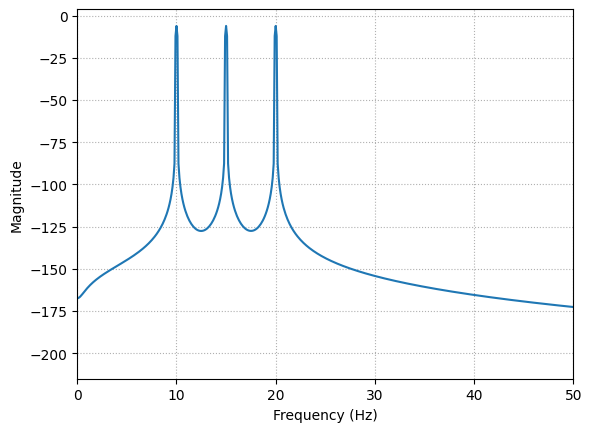

In [ ]:
# @title GRÁFICA EN EL DOMINIO DE LA FRECUENCIA

plt.magnitude_spectrum(data, Fs=fs, scale="dB")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(ls=":")
plt.xlim(0,50)
plt.show()

# DISEÑO DE FILTROS

In [ ]:
%%writefile filter.csv
4.273236221383033e-06,1.0
0.0,-7.505212586134488
-1.7092944885532127e-05,24.838462581094124
-1.6940658945086007e-20,-47.33663859466184
2.5639417328298224e-05,56.814618331033
-1.3552527156068805e-20,-43.97458537370928
-1.7092944885532127e-05,21.435744833335253
0.0,-6.017235695405117
4.273236221383033e-06,0.7448533727040305

Writing filter.csv


In [ ]:
df = pd.read_csv("filter.csv", names=["b","a"])

b = df.b
a = df.a

b, a

(0    4.273236e-06
 1    0.000000e+00
 2   -1.709294e-05
 3   -1.694066e-20
 4    2.563942e-05
 5   -1.355253e-20
 6   -1.709294e-05
 7    0.000000e+00
 8    4.273236e-06
 Name: b, dtype: float64,
 0     1.000000
 1    -7.505213
 2    24.838463
 3   -47.336639
 4    56.814618
 5   -43.974585
 6    21.435745
 7    -6.017236
 8     0.744853
 Name: a, dtype: float64)

In [ ]:
signalf = signal.lfilter(b, a, data)

signalf

array([ 0.00000000e+00,  2.98655122e-06,  2.81869583e-05, ...,
       -7.75330441e-01, -6.24853877e-01, -4.47263035e-01])

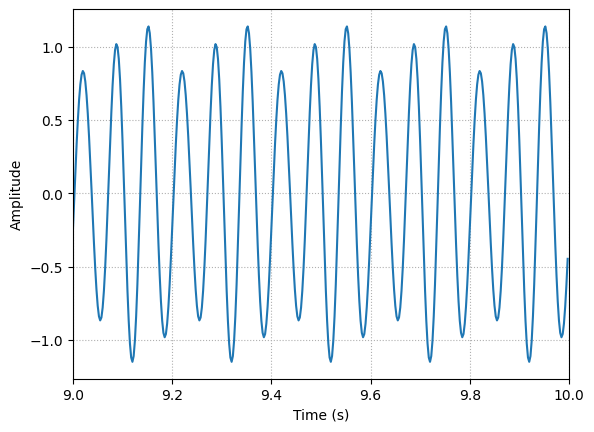

In [ ]:
plt.plot(t, signalf)
plt.xlim(9,10)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(ls=":")
plt.show()

In [ ]:
signalf_max = np.max(signalf)
signalf_max

1.1431341364811134

In [ ]:
G = data_max/signalf_max
G

2.4037090342902543

In [ ]:
signalg = signalf*G
signalg

array([ 0.00000000e+00,  7.17880015e-06,  6.77532463e-05, ...,
       -1.86366878e+00, -1.50196691e+00, -1.07509020e+00])

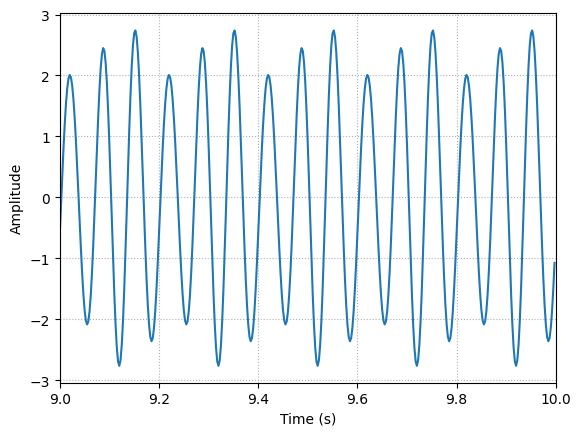

In [ ]:
# @title DOMINIO DEL TIEMPO CON GANANCIA
plt.plot(t, signalg)
plt.xlim(9,10)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(ls=":")
plt.show()

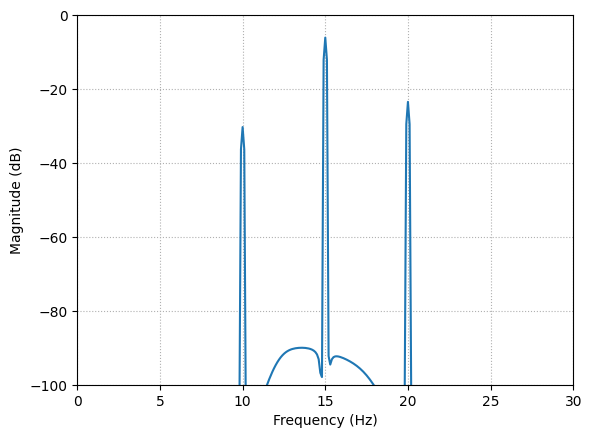

In [ ]:
# @title GRAFICA EN EL DOMINIO DE LA FRECUENCIA
plt.magnitude_spectrum(signalf, Fs=fs, scale="dB")
plt.xlabel('Frequency (Hz)')
#plt.ylabel('Magnitude')
plt.grid(ls=":")
plt.xlim(0,30)
plt.ylim(-100,0)
plt.show()

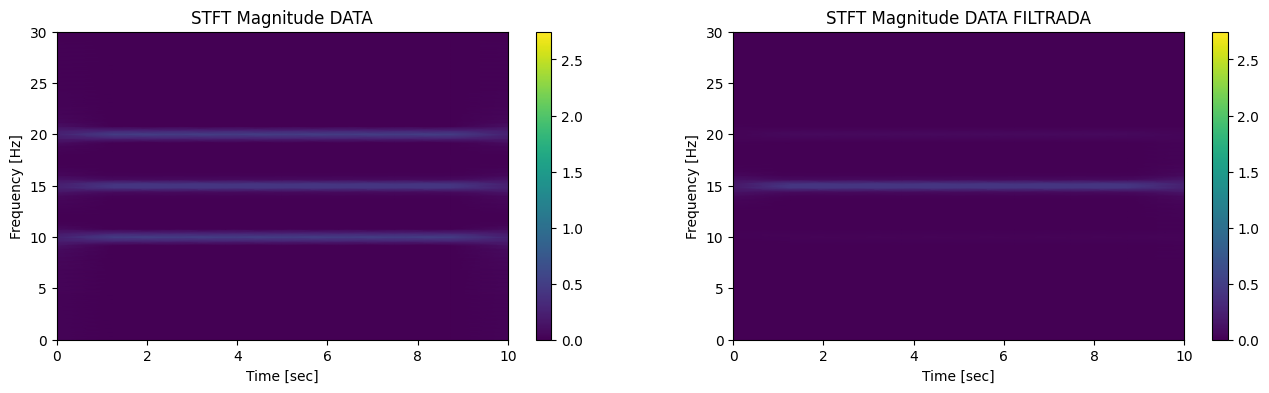

In [ ]:
# @title Default title text
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
f, t, Zxx = signal.stft(data, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(signalg), shading='gouraud')
plt.title('STFT Magnitude DATA')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,30)
plt.colorbar()
#plt.show()

plt.subplot(1,2,2)
f, t, Zxx = signal.stft(signalf, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(signalg), shading='gouraud')
plt.title('STFT Magnitude DATA FILTRADA')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,30)
plt.colorbar()
plt.show()

